              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.94      0.92      0.93       127

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



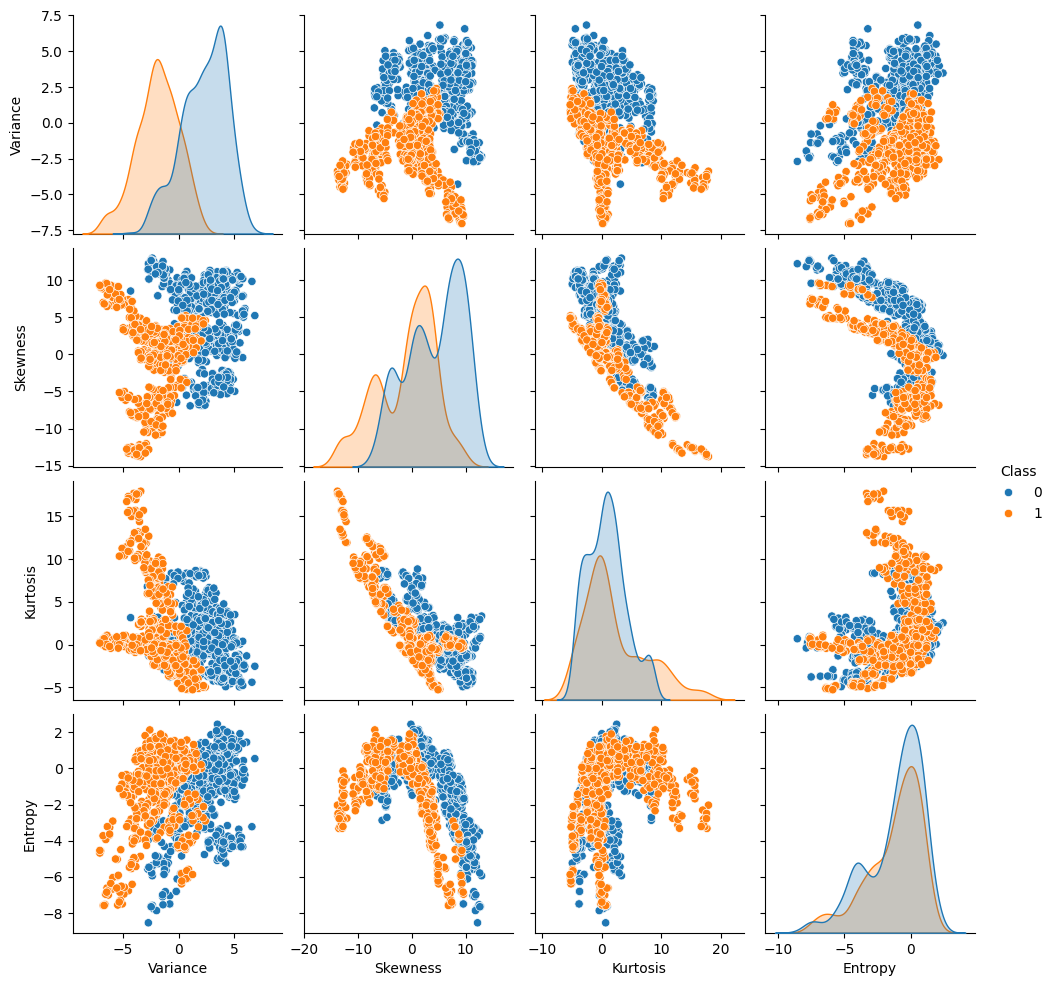

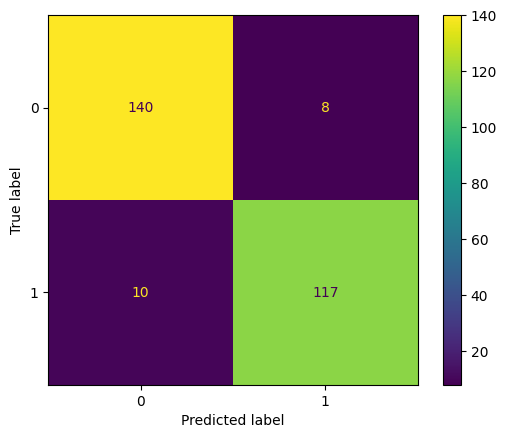

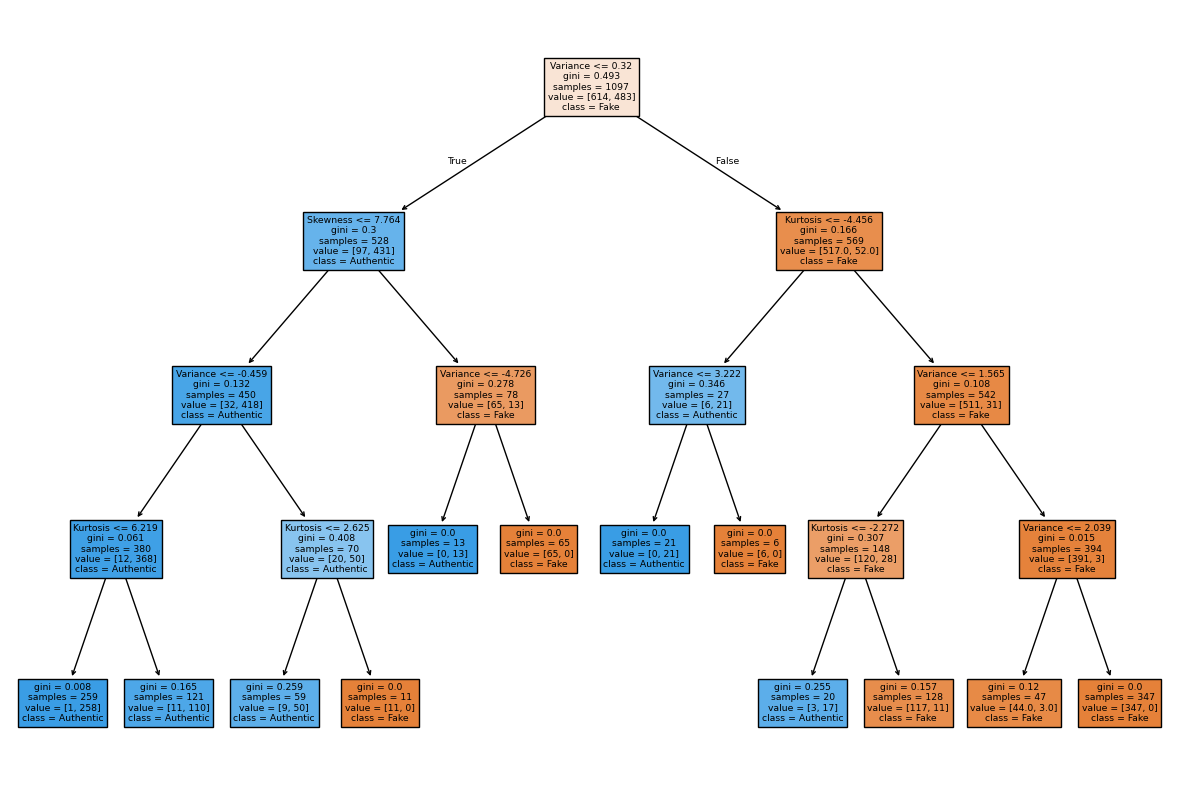

Variance: 0.7065
Skewness: 0.1634
Kurtosis: 0.1301
Entropy: 0.0000


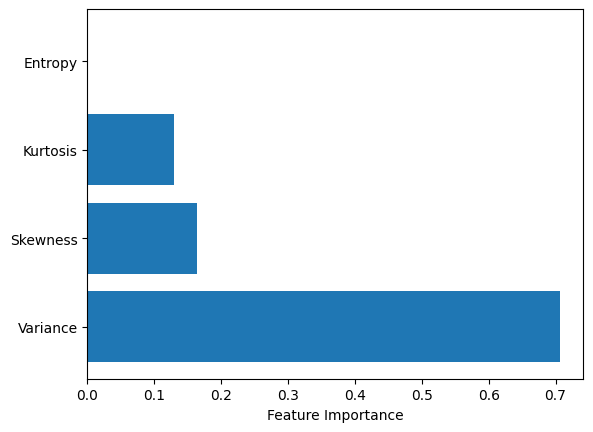

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_csv(url, header=None, names=columns)
sns.pairplot(df, hue='Class')

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)



plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'])
plt.show()

importances = clf.feature_importances_
for i, col in enumerate(X.columns):
    print(f'{col}: {importances[i]:.4f}')

plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.show()




